In [69]:
import os
import numpy as np
import panel as pn
pn.extension('plotly')
import plotly.express as px

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import holoviews as hv
import hvplot.pandas

import cufflinks as cf
cf.set_config_file(theme='solar',sharing='public',offline=True)
%matplotlib inline 

In [70]:
#Load csv files
gdp = pd.read_csv("../Data/ProcessedData/GDP_selected_countries_cleaned.csv")
gdp_bar = pd.read_csv("../Data/ProcessedData/GDP_selected_countries_cleaned.csv")
cash_rate = pd.read_csv("../Data/ProcessedData/cashrate_cleaned.csv")
population = pd.read_csv("../Data/ProcessedData/Population_June_Cleaned.csv")
employment = pd.read_csv("../Data/ProcessedData/employment_cleaned.csv")
economy = pd.read_csv("../Data/ProcessedData/Economy_June_Cleaned.csv")
household_income = pd.read_csv("../Data/ProcessedData/Household_Income_cleaned.csv")
sp500 = pd.read_csv("../Data/ProcessedData/SP500_history_cleaned.csv")

### Panel Visualisation Functions

In [71]:
# Define plots for world GDP comparisons
def world_gdp_hvplot_line():
    gdp_new = gdp.rename(columns={"Unnamed: 0": "Year"})
    gdp_bar_new = gdp.rename(columns={"Unnamed: 0": "Year"})
    
    # Set index for 1st df and convert Year to object for 2nd df
    gdp_new.set_index("Year", inplace=True)
    gdp_bar_new["Year"] = gdp_bar_new.Year.astype(str)
    
    world_gdp_hvplot_line = gdp_new.hvplot.line(ylabel='GDP (% change)', 
                                                title="GDP across all countries",
                                                shared_axes=False,
                                                line_dash='dotted',
                                                line_alpha=0.5)
    
    return world_gdp_hvplot_line


def world_gdp_hvplot_bar():
    gdp_bar_new = gdp.rename(columns={"Unnamed: 0": "Year"})
    
    # Set index for 1st df and convert Year to object for 2nd df
    gdp_bar_new["Year"] = gdp_bar_new.Year.astype(str)
    
    world_gdp_hvplot_bar = gdp_bar_new.hvplot.bar(ylabel='GDP (% change)', 
                                                  groupby="Year",
                                                  title="GDP across all countries")
    
    return world_gdp_hvplot_bar


#--------------------------X--------------------------#--------------------------X--------------------------#--------------------------X--------------------------
# Get demogrpahic data
year = population[["Year"]]

total_population = population[["EstimatedResidentPopulation"]]
total_employed = employment[["TotalEmployed"]]
total_employed_males = employment[["TotalEmployed_M"]]
total_employed_females = employment[["TotalEmployed_F"]]
total_unemployed = employment[["TotalUnemployed"]]
total_unemployed_males = employment[["TotalUnemployed_M"]]
total_unemployed_females = employment[["TotalUnemployed_F"]]

# Create df to correlate
aus_demographics_df = pd.concat([year,      
                                 total_population,
                                 total_employed, 
                                 total_employed_males,
                                 total_employed_females,
                                 total_unemployed,
                                 total_unemployed_males,
                                 total_unemployed_females], axis=1)

# Rename to easy convention
aus_demographics_renamed_df = aus_demographics_df.rename(columns={"EstimatedResidentPopulation": "Pop",
                                                                  "TotalEmployed": "Tot Emp",
                                                                  "TotalEmployed_M": "Tot Emp_M",
                                                                  "TotalEmployed_F": "Tot Emp_F",
                                                                  "TotalUnemployed": "Tot Unemp",
                                                                  "TotalUnemployed_M": "Tot Unemp_M",
                                                                  "TotalUnemployed_F": "Tot Unemp_F"})
# Index dataframe
aus_demographics_renamed_df.set_index("Year", inplace=True)


# Create second dataframe without total population
aus_demographics_renamed_d2 = aus_demographics_renamed_df.drop("Pop", axis=1)


# Generate line graphs using Cufflinks
def aus_demographics_all():
    aus_demographics_fig1 = aus_demographics_renamed_df.hvplot.line(ylabel='Demographics (millions)', 
                                                                    xlabel='Year',
                                                                    title="Aus demographics",
                                                                    shared_axes=False,                                                                    
                                                                    line_dash='dotted',
                                                                    line_alpha=0.5)   
    return aus_demographics_fig1
    
def aus_demographics_nopop():
    aus_demographics_fig2 = aus_demographics_renamed_d2.hvplot.line(ylabel='Demographics', 
                                                                    xlabel='Year',
                                                                    title="Aus demographics no total population",
                                                                    shared_axes=False,
                                                                    line_dash='dotted',
                                                                    line_alpha=0.5)  
    return aus_demographics_fig2
 
#--------------------------X--------------------------#--------------------------X--------------------------#--------------------------X--------------------------
# Get Australia's financial data
year = population[["Year"]]
asx_price = asx[["Price"]]
cash_rate_target = cash_rate[["Cash Rate Target"]]
overnight_cash_rate = cash_rate[["Interbank Overnight Cash Rate"]]
household_income_total = household_income[["TotalIncome"]]
household_savings_total = household_income[["TotalSavings"]]
net_savings = economy[["Net Savings"]]
gross_income = economy[["Total Use of Gross Income"]]

# Create df to correlate
aus_financials_df = pd.concat([year,
                               cash_rate_target,
                               overnight_cash_rate,
                               household_income_total,
                               household_savings_total,
                               net_savings,
                               gross_income], axis=1)

# Rename to easy convention
aus_financials_renamed_df = aus_financials_df.rename(columns={"Total Use of Gross Income": "Gross Income"})

#Check dataset
aus_financials_renamed_df.set_index("Year", inplace=True)

# Create dataframe without Gross Income
aus_financials_renamed_d2 = aus_financials_renamed_df.drop(["Gross Income"], axis=1)


def aus_financials_all():
    aus_financials_fig1 = aus_financials_renamed_df.hvplot.line(ylabel='Australian ($)', 
                                                                xlabel='Year',
                                                                title="Aus financials",
                                                                shared_axes=False,                                                                
                                                                line_dash='dotted',
                                                                line_alpha=0.5)        
    return aus_financials_fig1

def aus_financials_nogross():
    aus_financials_fig2 = aus_financials_renamed_d2.hvplot.line(ylabel='Australian ($)', 
                                                                xlabel='Year',
                                                                title="Aus financials",
                                                                shared_axes=False,
                                                                line_dash='dotted',
                                                                line_alpha=0.5)    
    return aus_financials_fig2


#--------------------------X--------------------------#--------------------------X--------------------------#--------------------------X--------------------------
# Clean population data
population = pd.read_csv("../Data/ProcessedData/Population_June_Cleaned.csv")
del population["Unnamed: 0"]
population.head()

# Get data to run correlation
year = population[["Year"]]
gdp_new = gdp.rename(columns={"Unnamed: 0": "Year"})
gdp_aus_new = gdp_new[["Australia"]].reset_index(drop=True)

total_population = population[["EstimatedResidentPopulation"]]
total_employed = employment[["TotalEmployed"]]
total_employed_males = employment[["TotalEmployed_M"]]
total_employed_females = employment[["TotalEmployed_F"]]
total_unemployed = employment[["TotalUnemployed"]]
total_unemployed_males = employment[["TotalUnemployed_M"]]
total_unemployed_females = employment[["TotalUnemployed_F"]]

cash_rate_target = cash_rate[["Cash Rate Target"]]
overnight_cash_rate = cash_rate[["Interbank Overnight Cash Rate"]]
household_income_total = household_income[["TotalIncome"]]
household_savings_total = household_income[["TotalSavings"]]
net_savings = economy[["Net Savings"]]
gross_income = economy[["Total Use of Gross Income"]]


# Create df to correlate
correlation_df = pd.concat([gdp_aus_new,
                            total_population,
                            total_employed, 
                            total_employed_males,
                            total_employed_females,
                            total_unemployed,
                            total_unemployed_males,
                            total_unemployed_females,
                            cash_rate_target,
                            overnight_cash_rate,
                            household_income_total,
                            household_savings_total,
                            net_savings,
                            gross_income], axis=1)

# Rename to easy convention
correlation_renamed_df = correlation_df.rename(columns={"Australia": "Aus_GDP",
                                                        "EstimatedResidentPopulation": "Pop",
                                                        "TotalEmployed": "Tot Emp",
                                                        "TotalEmployed_M": "Tot Emp_M",
                                                        "TotalEmployed_F": "Tot Emp_F",
                                                        "TotalUnemployed": "Tot Unemp",
                                                        "TotalUnemployed_M": "Tot Unemp_M",
                                                        "TotalUnemployed_F": "Tot Unemp_F",
                                                        "Total Use of Gross Income": "Gross Income"})


# Run correlation on the full Aus dataset
correlation = correlation_renamed_df.corr()

# Create heatmap using Seaborn
def heatmap_seaborn():
    heatmap = plt.figure()
    
    matrix = np.triu(correlation)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    h = plt.axes()
    
    plot = sns.heatmap(correlation, 
                       vmin=-1, 
                       vmax=1, 
                       annot=True,
                       cmap=cmap, 
                       mask=matrix)

    sns.set(rc={'figure.figsize':(10,7)})
    h.set_title('Aus Economy')
    
    plt.close()
    
    return pn.pane.Matplotlib(heatmap, tight=True)


#--------------------------X--------------------------#--------------------------X--------------------------#--------------------------X--------------------------
# Create line plot for GDP growth rate across all countries
#GDP growth
def gdp_growth_line():
    
    gdp_growth = pd.read_csv("../Data/ProcessedData/aus_vs_world_gdp_growth_cleaned.csv")
    gdp_growth_clean = gdp_growth.drop('Unnamed: 0', axis=1).set_index("Year")

    gdp_growth_line = gdp_growth_clean.hvplot.line(ylabel='% change', 
                                                   xlabel='Year',
                                                   title="GDP growth",
                                                   shared_axes=False, 
                                                   line_dash='dotted',
                                                   line_alpha=0.5)
    return gdp_growth_line 

def gdp_growth_bar():
    gdp_growth = pd.read_csv("../Data/ProcessedData/aus_vs_world_gdp_growth_cleaned.csv")
    gdp_growth["Year"] = gdp_growth.Year.astype(str)
    gdp_growth_clean2 = gdp_growth.drop('Unnamed: 0', axis=1)
    
    gdp_growth_bar = gdp_growth_clean2.hvplot.bar(ylabel='% change', 
                                                  groupby="Year",
                                                  shared_axes=False,
                                                  title="GDP growth")
    return gdp_growth_bar

# Goods export
def good_export_line():
    goods_export = pd.read_csv("../Data/ProcessedData/aus_vs_world_goods_export_cleaned.csv")
    goods_export_clean = goods_export.drop('Unnamed: 0', axis=1).set_index("Year")

    goods_export_line = goods_export_clean.hvplot.line(ylabel='amount (millions)', 
                                                       xlabel='Year',
                                                       title="Goods export",
                                                       shared_axes=False, 
                                                       line_dash='dotted',
                                                       line_alpha=0.5,
                                                       yformatter="%.0f")                                                       
    return goods_export_line
    
# Clean bar graph for goods export
def good_export_bar():
    goods_export = pd.read_csv("../Data/ProcessedData/aus_vs_world_goods_export_cleaned.csv")    
    goods_export["Year"] = goods_export.Year.astype(str)
    goods_export_clean2 = goods_export.drop('Unnamed: 0', axis=1)
    
    goods_export_bar = goods_export_clean2.hvplot.bar(ylabel='amount (millions)', 
                                                      groupby="Year",
                                                      shared_axes=False,
                                                      title="Goods export",
                                                      yformatter="%.0f")                                                 
    return goods_export_bar


# World Inflation
def world_inflation_line():
    world_inflation = pd.read_csv("../Data/ProcessedData/aus_vs_world_inflation_cleaned.csv")
    world_inflation_clean = world_inflation.drop('Unnamed: 0', axis=1).set_index("Year")
    
    world_inflation_line = world_inflation_clean.hvplot.line(ylabel='% change', 
                                                             xlabel='Year',
                                                             title="World Inflation",
                                                             shared_axes=False, 
                                                             line_dash='dotted',
                                                             line_alpha=0.5)
    
    
    return world_inflation_line

def world_inflation_bar():
    world_inflation = pd.read_csv("../Data/ProcessedData/aus_vs_world_inflation_cleaned.csv")
    world_inflation["Year"] = world_inflation.Year.astype(str)
    world_inflation_clean2 = world_inflation.drop('Unnamed: 0', axis=1)
    
    world_inflation_bar = world_inflation_clean2.hvplot.bar(ylabel='% change', 
                                                            groupby="Year",
                                                            shared_axes=False,
                                                            title="World Inflation")
    
    return world_inflation_bar



# World population
def world_population_line():
    world_population = pd.read_csv("../Data/ProcessedData/aus_vs_world_population_cleaned.csv")
    world_population_clean = world_population.drop('Unnamed: 0', axis=1).set_index("Year")
    
    world_population_line = world_population_clean.hvplot.line(ylabel='millions', 
                                                               xlabel='Year',
                                                               title="World Population",
                                                               shared_axes=False, 
                                                               line_dash='dotted',
                                                               line_alpha=0.5,
                                                               yformatter="%.0f")
    return world_population_line


def world_population_bar():
    world_population = pd.read_csv("../Data/ProcessedData/aus_vs_world_population_cleaned.csv")
    world_population["Year"] = world_population.Year.astype(str)
    world_population_clean2 = world_population.drop('Unnamed: 0', axis=1)
    
    world_population_bar = world_population_clean2.hvplot.bar(ylabel='millions', 
                                                              groupby="Year",
                                                              shared_axes=False,
                                                              title="World Population",
                                                              yformatter="%.0f")
    return world_population_bar


In [72]:
# Define panels
title = pn.pane.Markdown(
    """
    ## Analysis of the Australian Economy
    """
)

World_GDP = pn.Row(world_gdp_hvplot_line(), world_gdp_hvplot_bar())
Aus_Demographics = pn.Row(aus_demographics_all(), aus_demographics_nopop())
Aus_Financials = pn.Row(aus_financials_all(), aus_financials_nogross())
Aus_Correlation = pn.Row(heatmap_seaborn())
World_gdp_growth = pn.Row(gdp_growth_line(), gdp_growth_bar())
World_goods_export = pn.Row(good_export_line(), good_export_bar())
World_inflation = pn.Row(world_inflation_line(), world_inflation_bar())
World_population = pn.Row(world_population_line(), world_population_bar())

In [73]:
# Create dashboard
aus_economy_tabs = pn.Tabs(("GDP comparisons", World_GDP),
                           ("Australia Demograhics", Aus_Demographics),
                           ("Australia Financials", Aus_Financials),
                           ("Australia Correlation", Aus_Correlation),
                           ("Australia vs World", pn.Column(World_gdp_growth, World_goods_export, World_inflation, World_population)))
                            

aus_economy_dashboard = pn.Column(pn.Row(title),
                                  aus_economy_tabs,
                                  width=1000)

Column(width=1000)
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Row
            [0] HoloViews(NdOverlay)
            [1] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='Year', options=['1995', '1996', ...], value='1995', width=250)
                    [1] VSpacer()
        [1] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
        [2] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
        [3] Row
            [0] Matplotlib(Figure, tight=True)
        [4] Column
            [0] Row
                [0] HoloViews(NdOverlay)
                [1] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Year', options=['1998', '1999', ...], value='1998', width=250)
                        [1] VSpacer()
            [1] Row
                [0] HoloViews(NdOverlay)
                [1] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Year', options=['1996', '1997', ...], value='1996', width=250)
                        [1] VSpacer()
            [2] Row
                [0] HoloViews(NdOverlay)
                [1] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Year', options=['1995', '1996', ...], value='1995', width=250)
                        [1] VSpacer()
            [3] Row
                [0] HoloViews(NdOverlay)
                [1] Row
                    [0] HoloViews(DynamicMap)
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='Year', options=['1995', '1996', ...], value='1995', width=250)
                        [1] VSpacer()
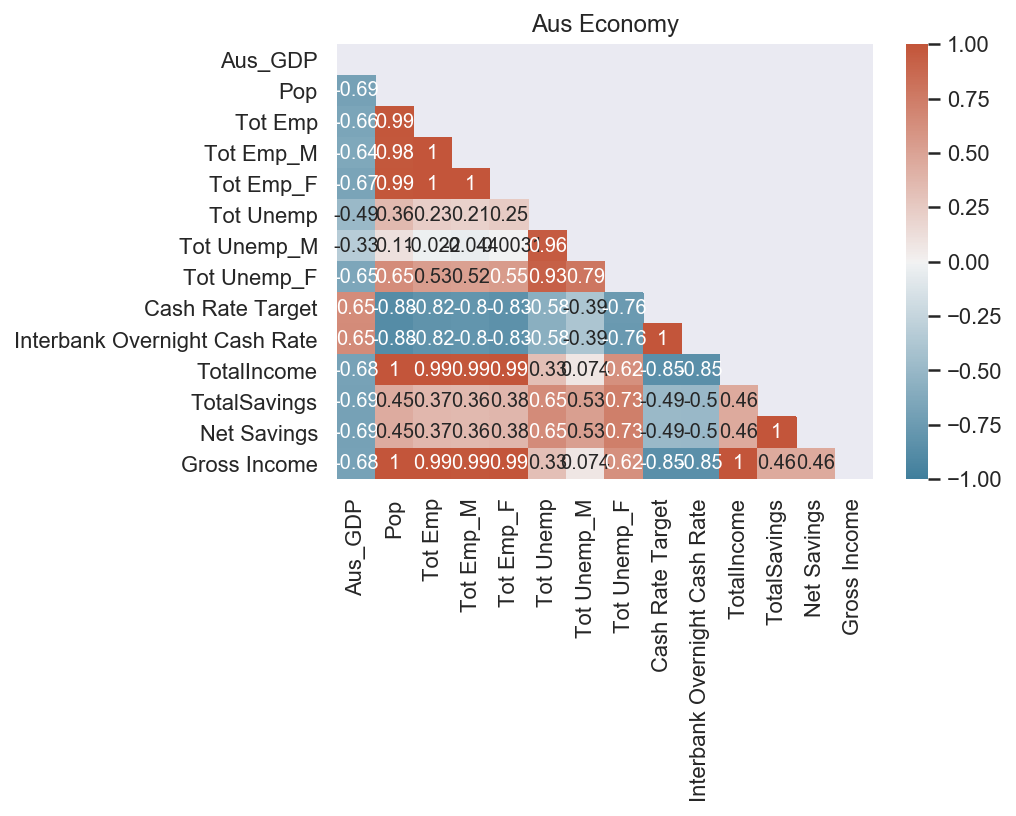

In [74]:
aus_economy_dashboard.servable()